
Training on Task 0
Post-training accuracy on Task 0: 70.70%
✓ Figure saved: figures_cifar/task_0_importance.pdf


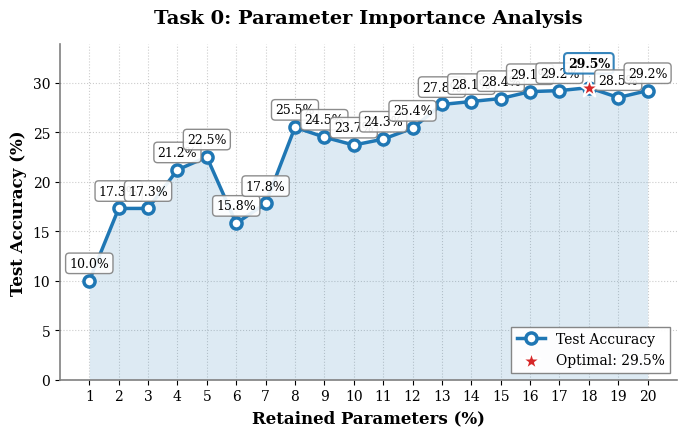


Training on Task 1
Post-training accuracy on Task 1: 74.80%
✓ Figure saved: figures_cifar/task_1_importance.pdf


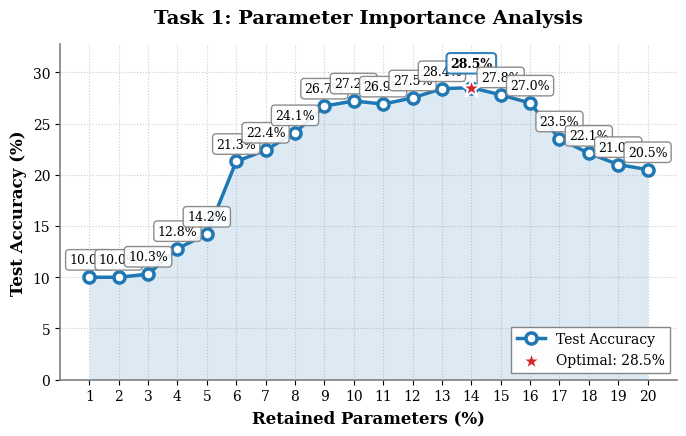


Training on Task 2
Post-training accuracy on Task 2: 74.60%
✓ Figure saved: figures_cifar/task_2_importance.pdf


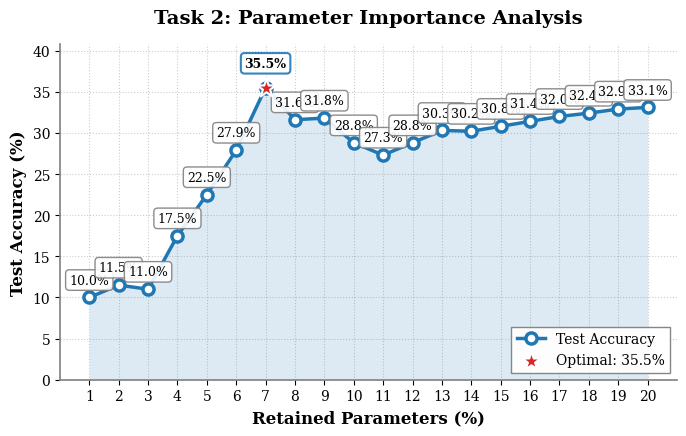


Training on Task 3
Post-training accuracy on Task 3: 67.50%
✓ Figure saved: figures_cifar/task_3_importance.pdf


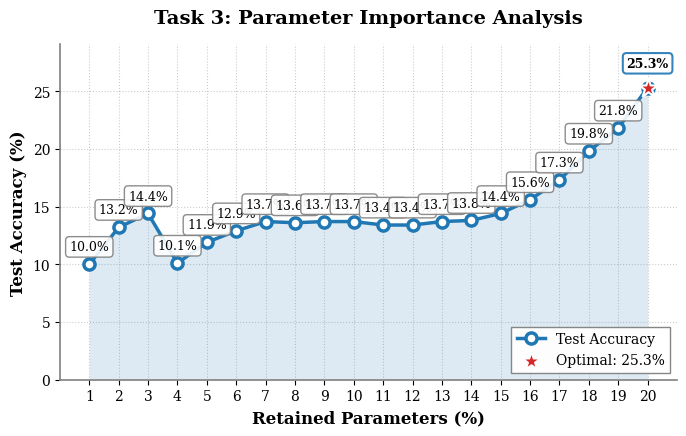


Training on Task 4
Post-training accuracy on Task 4: 73.20%
✓ Figure saved: figures_cifar/task_4_importance.pdf


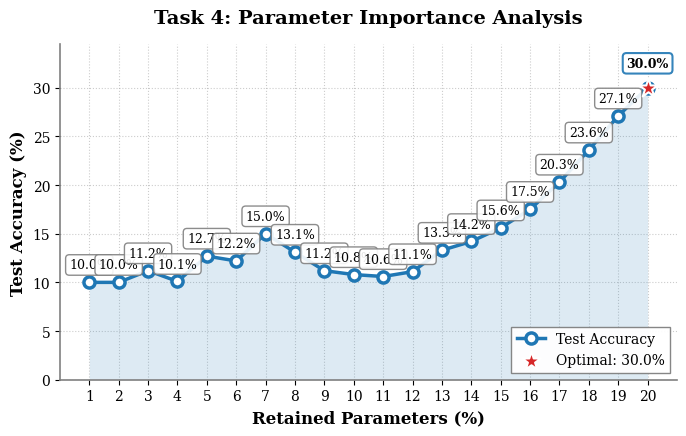


Training on Task 5
Post-training accuracy on Task 5: 68.20%
✓ Figure saved: figures_cifar/task_5_importance.pdf


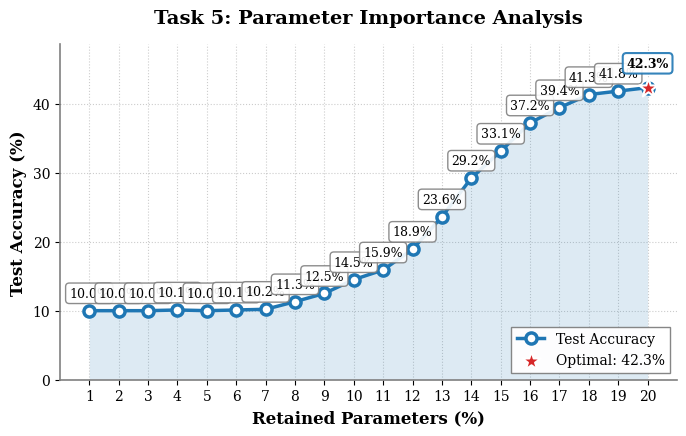


Training on Task 6
Post-training accuracy on Task 6: 71.80%
✓ Figure saved: figures_cifar/task_6_importance.pdf


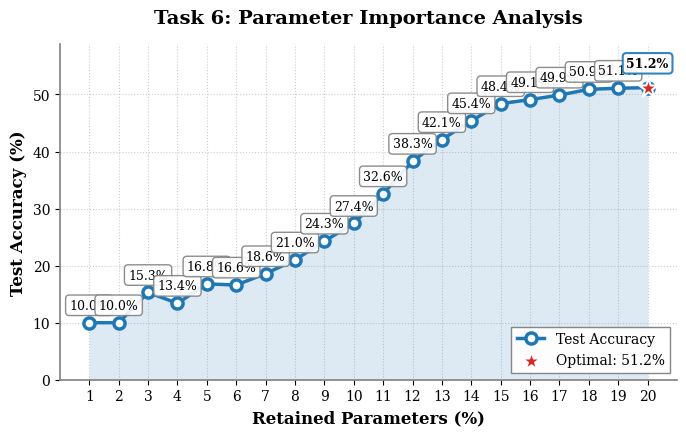


Training on Task 7
Post-training accuracy on Task 7: 62.30%
✓ Figure saved: figures_cifar/task_7_importance.pdf


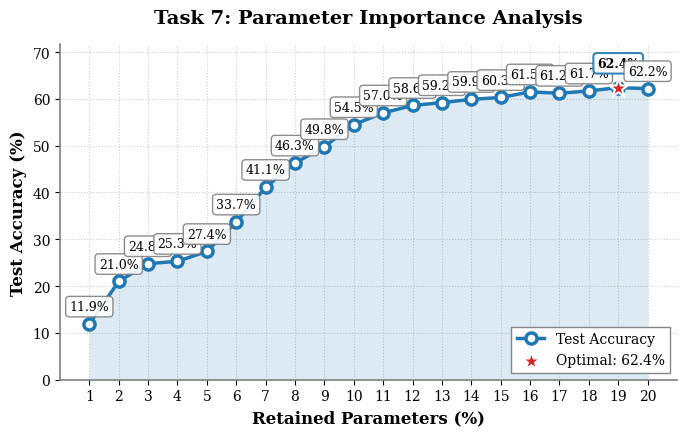


Training on Task 8
Post-training accuracy on Task 8: 72.30%
✓ Figure saved: figures_cifar/task_8_importance.pdf


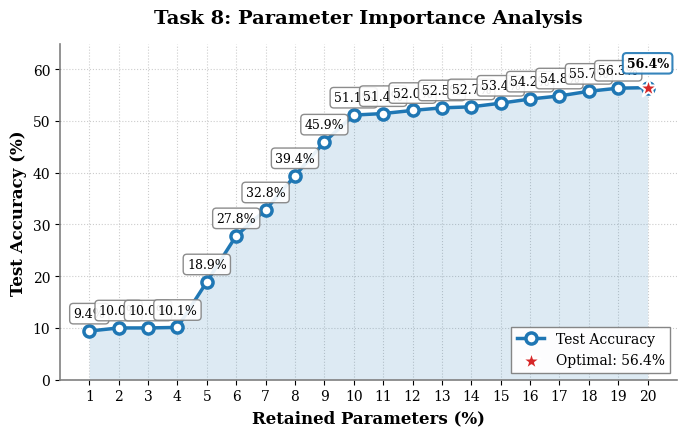


Training on Task 9
Post-training accuracy on Task 9: 74.50%
✓ Figure saved: figures_cifar/task_9_importance.pdf


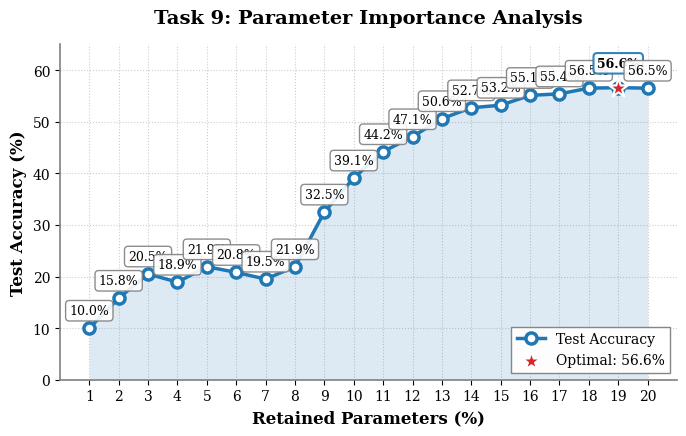


✅ Training completed for all tasks

Final performance on all tasks:
Average Accuracy: 7.45%

Per-task accuracies:
  Task 0: 0.00%
  Task 1: 0.00%
  Task 2: 0.00%
  Task 3: 0.00%
  Task 4: 0.00%
  Task 5: 0.00%
  Task 6: 0.00%
  Task 7: 0.00%
  Task 8: 0.00%
  Task 9: 74.50%


In [3]:
from model_cifar import (network_cifar, naive_train, test_taskwise, test, 
                         benchmark, train_stream, test_stream, 
                         compute_fisher_information, apply_importance_mask)
from torch.utils.data import DataLoader, Subset
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from plot import plot_parameter_importance
import os


# Create model
model = network_cifar()
model_2 = network_cifar()

# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model_2.to(device)

# Setup training
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 10

# Create figures directory
os.makedirs('figures_cifar', exist_ok=True)

# Storage for all tasks data
all_tasks_data = {}

# Train and evaluate on all 10 tasks
for task in range(10):
    print(f"\n{'='*70}")
    print(f"Training on Task {task}")
    print(f"{'='*70}")

    # Train on current task
    naive_train(model, task, epochs, criterion=criterion, optimizer=optimizer, device=device)
    acc = test_taskwise(model, task, device)
    print(f"Post-training accuracy on Task {task}: {acc:.2f}%")

    # Compute Fisher Information
    fisher_dict = compute_fisher_information(model, task_number=task, num_samples=1000,
                                            criterion=criterion, device=device)
    
    # Analyze parameter importance
    percent_list = list(range(1, 21))
    accuracy_vs_percent = []

    # Store original weights
    original_weights = {name: param.clone() for name, param in model.state_dict().items()}
    
    # Test with different percentages of important parameters
    for p in percent_list:
        model, mask_dict = apply_importance_mask(model, fisher_dict, importance_percent=p)
        acc_p = test_taskwise(model, task, device)
        accuracy_vs_percent.append(acc_p)
        model.load_state_dict(original_weights, strict=False)

    # Store data for this task
    all_tasks_data[task] = (percent_list, accuracy_vs_percent)
    
    # Create publication-quality plot
    plot_parameter_importance(
        percent_list=percent_list,
        accuracy_list=accuracy_vs_percent,
        task_id=task,
        save_path=f'figures_cifar/task_{task}_importance.pdf',
        show_plot=True  # Set to False to not display during training
    )

print("\n" + "="*70)
print("✅ Training completed for all tasks")
print("="*70)

# Test final average accuracy
print("\nFinal performance on all tasks:")
avg_acc, acc_list = test(model, device)
print("\nPer-task accuracies:")
for i, acc in enumerate(acc_list):
    print(f"  Task {i}: {acc:.2f}%")



Training on Task 0
Post-training accuracy on Task 0: 69.50%
Saving top 20% important weights for Task 0...
Done saving.
✓ Figure saved: figures_cifar/task_0_importance.pdf


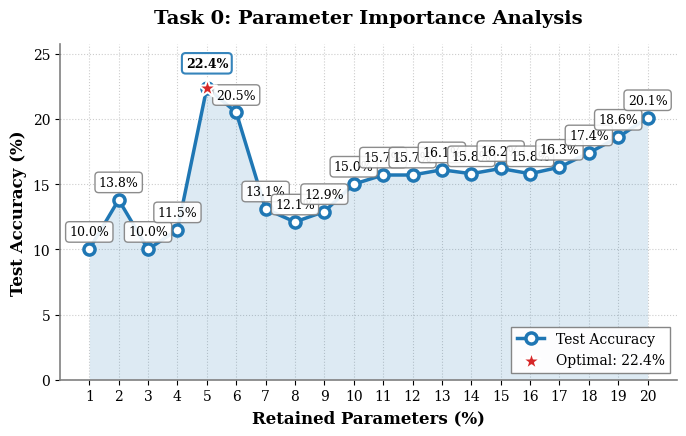


Training on Task 1
Post-training accuracy on Task 1: 69.10%
Saving top 20% important weights for Task 1...
Done saving.
✓ Figure saved: figures_cifar/task_1_importance.pdf


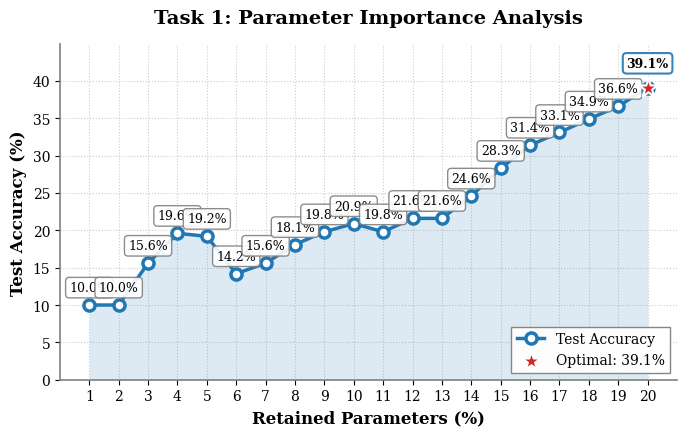


Training on Task 2
Post-training accuracy on Task 2: 68.70%
Saving top 20% important weights for Task 2...
Done saving.
✓ Figure saved: figures_cifar/task_2_importance.pdf


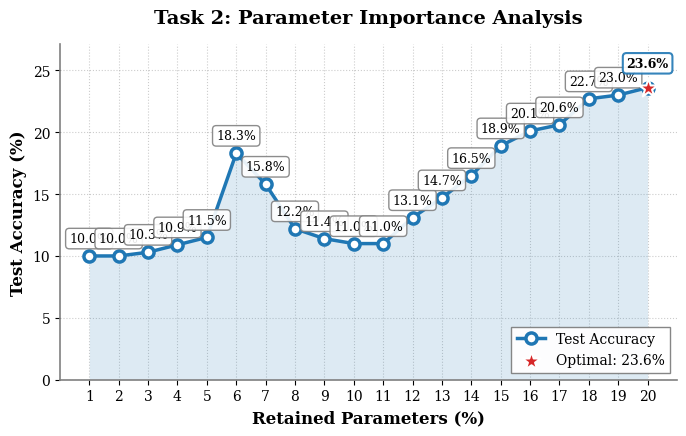


Training on Task 3
Post-training accuracy on Task 3: 69.30%
Saving top 20% important weights for Task 3...
Done saving.
✓ Figure saved: figures_cifar/task_3_importance.pdf


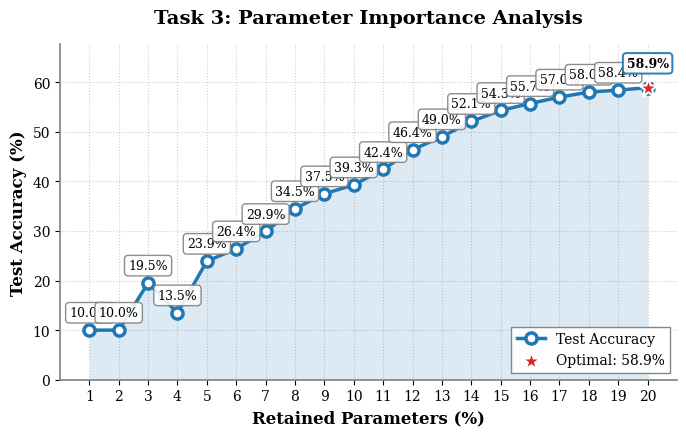


Training on Task 4
Post-training accuracy on Task 4: 69.40%
Saving top 20% important weights for Task 4...
Done saving.
✓ Figure saved: figures_cifar/task_4_importance.pdf


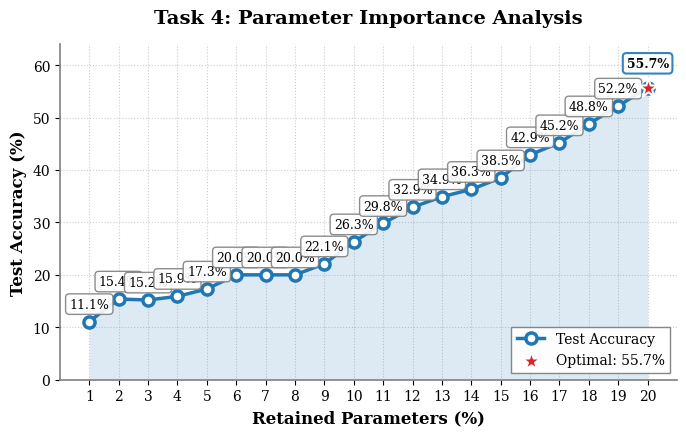


Training on Task 5
Post-training accuracy on Task 5: 71.80%
Saving top 20% important weights for Task 5...
Done saving.
✓ Figure saved: figures_cifar/task_5_importance.pdf


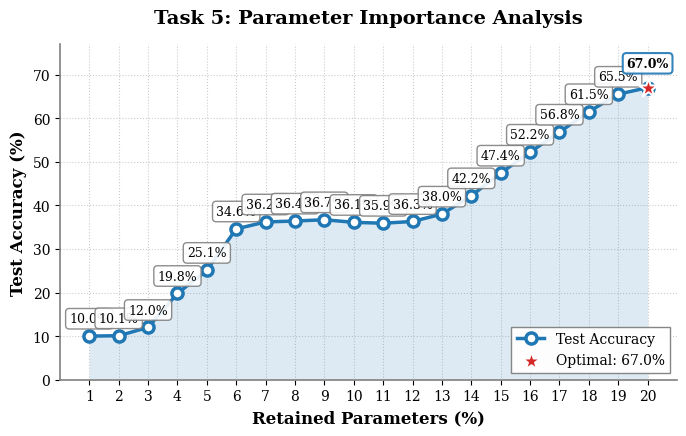


Training on Task 6
Post-training accuracy on Task 6: 73.20%
Saving top 20% important weights for Task 6...
Done saving.
✓ Figure saved: figures_cifar/task_6_importance.pdf


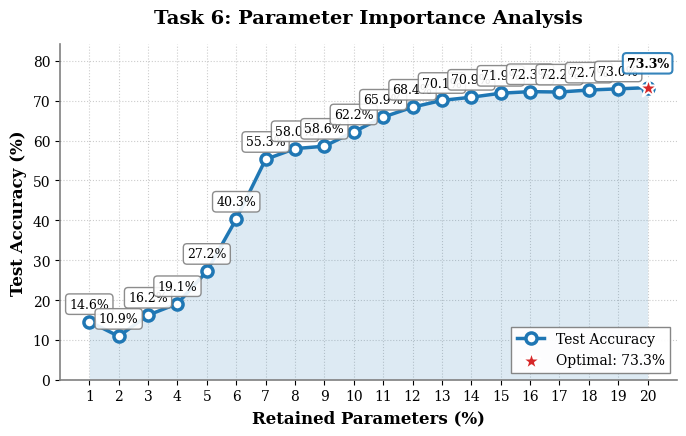


Training on Task 7
Post-training accuracy on Task 7: 68.10%
Saving top 20% important weights for Task 7...
Done saving.
✓ Figure saved: figures_cifar/task_7_importance.pdf


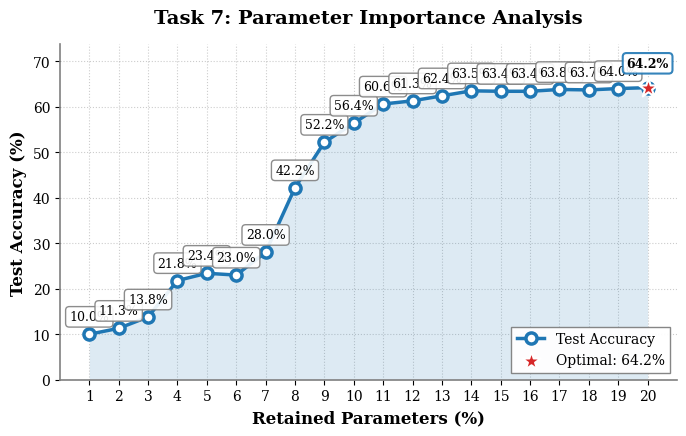


Training on Task 8
Post-training accuracy on Task 8: 73.70%
Saving top 20% important weights for Task 8...
Done saving.
✓ Figure saved: figures_cifar/task_8_importance.pdf


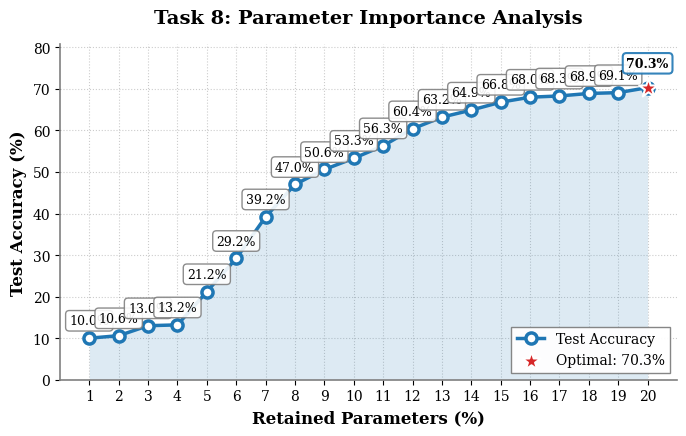


Training on Task 9
Post-training accuracy on Task 9: 83.10%
Saving top 20% important weights for Task 9...
Done saving.
✓ Figure saved: figures_cifar/task_9_importance.pdf


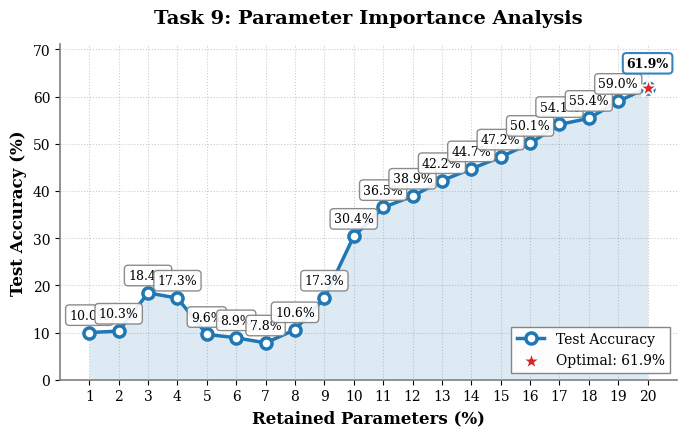


✅ Training completed for all tasks. Final backbone model saved.

Final performance on all tasks (using final backbone model):
Average Accuracy: 8.31%

Per-task accuracies:
  Task 0: 0.00%
  Task 1: 0.00%
  Task 2: 0.00%
  Task 3: 0.00%
  Task 4: 0.00%
  Task 5: 0.00%
  Task 6: 0.00%
  Task 7: 0.00%
  Task 8: 0.00%
  Task 9: 83.10%

Running New Evaluation (Sparse vs. Hybrid)...

--- Testing on Task 0 ---
  Method A (Top 20% Only): Accuracy = 20.10%
  Method B (Top 20% + Backbone): Accuracy = 10.00%

--- Testing on Task 1 ---
  Method A (Top 20% Only): Accuracy = 39.10%
  Method B (Top 20% + Backbone): Accuracy = 10.00%

--- Testing on Task 2 ---
  Method A (Top 20% Only): Accuracy = 23.60%
  Method B (Top 20% + Backbone): Accuracy = 10.00%

--- Testing on Task 3 ---
  Method A (Top 20% Only): Accuracy = 58.90%
  Method B (Top 20% + Backbone): Accuracy = 12.70%

--- Testing on Task 4 ---
  Method A (Top 20% Only): Accuracy = 55.70%
  Method B (Top 20% + Backbone): Accuracy = 14.50%

---

In [8]:
from model_cifar import (network_cifar, naive_train, test_taskwise, test, 
                         benchmark, train_stream, test_stream, 
                         compute_fisher_information, apply_importance_mask)
from torch.utils.data import DataLoader, Subset
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from plot import plot_parameter_importance
import os
import copy  # <-- Added import

# -------------------------------------------------------------------
# HELPER FUNCTIONS FOR SAVING/RESTORING WEIGHTS
# (These are unchanged)
# -------------------------------------------------------------------

def get_top_n_weights_data(model, fisher_dict, top_n_percent):
    """
    Identifies and returns the top N% of weights based on Fisher scores.
    
    Returns:
        dict: A dictionary containing the mask and values for each layer.
              Format: {name: {'mask': tensor, 'values': tensor}}
    """
    # 1. Flatten all Fisher scores to find the global threshold
    all_scores = torch.cat([f.view(-1) for f in fisher_dict.values()])
    
    # 2. Calculate the threshold value
    threshold_quantile = 1.0 - (top_n_percent / 100.0)
    threshold = torch.quantile(all_scores, threshold_quantile)
    
    important_weights_data = {}
    
    # 3. Create masks and store the original values
    with torch.no_grad():
        for name, param in model.named_parameters():
            if name in fisher_dict:
                # Create a binary mask: 1 where score >= threshold, 0 otherwise
                mask = fisher_dict[name] >= threshold
                
                # Use the mask to get the actual weight values
                important_values = param.data[mask]
                
                important_weights_data[name] = {
                    'mask': mask.cpu(),  # Move to CPU for efficiency
                    'values': important_values.cpu()
                }
    return important_weights_data

def restore_weights(model, weights_data):
    """
    Restores the saved important weights into a model in-place.
    
    Args:
        model (nn.Module): The model to restore weights into.
        weights_data (dict): The data from get_top_n_weights_data.
    """
    device = next(model.parameters()).device
    with torch.no_grad():
        for name, param in model.named_parameters():
            if name in weights_data:
                data = weights_data[name]
                mask = data['mask'].to(device)
                saved_values = data['values'].to(device)
                
                # Use the mask to "paste" the saved values
                param.data[mask] = saved_values
    return model

# -------------------------------------------------------------------
# SETUP
# -------------------------------------------------------------------

# Create model
model = network_cifar()
# model_2 = network_cifar() # No longer needed

# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Setup training
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 10

# Create figures directory
os.makedirs('figures_cifar', exist_ok=True)

# Storage for all tasks data
all_tasks_data = {}
all_task_important_weights = {} # To store top 20% params
all_task_state_dicts = {}       # <-- NEW: To store full state (with BN buffers)

# -------------------------------------------------------------------
# TRAINING LOOP
# -------------------------------------------------------------------

# Train and evaluate on all 10 tasks
for task in range(10):
    print(f"\n{'='*70}")
    print(f"Training on Task {task}")
    print(f"{'='*70}")

    # Train on current task
    naive_train(model, task, epochs, criterion=criterion, optimizer=optimizer, device=device)
    acc = test_taskwise(model, task, device)
    print(f"Post-training accuracy on Task {task}: {acc:.2f}%")

    # Compute Fisher Information
    fisher_dict = compute_fisher_information(model, task_number=task, num_samples=1000,
                                            criterion=criterion, device=device)

    # --- NEW: Save the top 20% of weights for this task ---
    print(f"Saving top 20% important weights for Task {task}...")
    task_20_percent_data = get_top_n_weights_data(model, fisher_dict, top_n_percent=20.0)
    all_task_important_weights[task] = task_20_percent_data
    print("Done saving.")

    # --- NEW: Save the ENTIRE state_dict for this task ---
    # This includes weights, biases, AND the bn.running_mean/bn.running_var
    all_task_state_dicts[task] = copy.deepcopy(model.state_dict())
    
    # --- Your original analysis loop (unchanged) ---
    percent_list = list(range(1, 21))
    accuracy_vs_percent = []

    # Store original weights
    original_weights = {name: param.clone() for name, param in model.state_dict().items()}
    
    # Test with different percentages of important parameters
    for p in percent_list:
        model, mask_dict = apply_importance_mask(model, fisher_dict, importance_percent=p)
        acc_p = test_taskwise(model, task, device)
        accuracy_vs_percent.append(acc_p)
        model.load_state_dict(original_weights, strict=True) # Use strict=True for safety

    # Store data for this task
    all_tasks_data[task] = (percent_list, accuracy_vs_percent)
    
    # Create publication-quality plot
    plot_parameter_importance(
        percent_list=percent_list,
        accuracy_list=accuracy_vs_percent,
        task_id=task,
        save_path=f'figures_cifar/task_{task}_importance.pdf',
        show_plot=True  # Set to False to not display during training
    )
    # --- End of original analysis loop ---

# Save the final model state as the "backbone"
backbone_state_dict = copy.deepcopy(model.state_dict())
print(f"\n{'='*70}")
print("✅ Training completed for all tasks. Final backbone model saved.")
print("="*70)

# -------------------------------------------------------------------
# ORIGINAL FINAL EVALUATION (UNCHANGED)
# -------------------------------------------------------------------
print("\nFinal performance on all tasks (using final backbone model):")
avg_acc, acc_list = test(model, device)
print("\nPer-task accuracies:")
for i, acc in enumerate(acc_list):
    print(f"  Task {i}: {acc:.2f}%")

# -------------------------------------------------------------------
# NEW FINAL EVALUATION (MODIFIED AND FIXED)
# -------------------------------------------------------------------
print(f"\n{'='*70}")
print("Running New Evaluation (Sparse vs. Hybrid)...")
print(f"{'='*70}")

# --- Create ONE reusable test model instance ---
test_model = network_cifar().to(device)

for task_to_test in range(10):
    print(f"\n--- Testing on Task {task_to_test} ---")
    
    # Retrieve the saved data for this task
    task_weight_data = all_task_important_weights[task_to_test]
    task_state_dict = all_task_state_dicts[task_to_test] # <-- Get the full state

    # --- Test A: Top 20% Weights Only (Sparse Model) ---
    # This test is now CORRECT. It loads the task-specific state (including
    # BN buffers) and then zeroes out the unimportant weights.
    
    # 1. Load the task's full, original state (weights + BN buffers)
    test_model.load_state_dict(task_state_dict)
    
    # 2. Zero out the unimportant weights
    with torch.no_grad():
        for name, param in test_model.named_parameters():
            if name in task_weight_data:
                # Get the mask of important weights
                mask = task_weight_data[name]['mask'].to(device)
                # Apply the mask (zero out where mask is 0)
                param.data.mul_(mask)
            elif param.requires_grad:
                # Zero out any other parameters not in the fisher dict
                param.data.fill_(0.0)
            
    acc_sparse = test_taskwise(test_model, task_to_test, device)
    print(f"  Method A (Top 20% Only): Accuracy = {acc_sparse:.2f}%")

    # --- Test B: Top 20% Weights + Backbone ---
    # This test loads the final backbone (with its own BN buffers)
    # and then pastes in the task-specific parameters (including BN params).
    # NOTE: The low accuracy you saw is the EXPECTED result, as this
    # creates a mismatch between the backbone's BN buffers (from task 9)
    # and the restored BN weights/biases (from the task being tested).
    
    # 1. Load the final backbone weights and BN buffers
    test_model.load_state_dict(backbone_state_dict)
    
    # 2. Overwrite with the task-specific 20% (including BN params)
    restore_weights(test_model, task_weight_data)
    
    acc_hybrid = test_taskwise(test_model, task_to_test, device)
    print(f"  Method B (Top 20% + Backbone): Accuracy = {acc_hybrid:.2f}%")

print("\nEvaluation complete.")